In [3]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/r/linux-64          [<=>                 ] (00m:00s) 
pkgs/r/linux-64        

In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Graphing Function


In [19]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


In [5]:
stock = yf.Ticker('TSLA')
tesla_data = stock.history(period='max')
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


In [21]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
tesla_data = requests.get(url).text

In [22]:
soup = BeautifulSoup(tesla_data, "html")

In [23]:
tesla_revenue = pd.DataFrame(columns=['Date','Revenue'])

for row in soup.find('tbody').find_all('tr'):
    col = row.find_all('td')
    Date = col[0].text
    Revenue = col[1].text[1:].replace(",","")
    tesla_revenue = tesla_revenue.append({'Date':Date,'Revenue':Revenue},ignore_index=True)

In [24]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [25]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Question 3: Use yfinance to Extract Stock Data


In [6]:
GME = yf.Ticker('GME')
gme_data = GME.history(period='max')
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658001,1.674833,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


In [27]:
url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data=requests.get(url2).text

In [28]:
soup2 = BeautifulSoup(html_data,'html')

In [29]:
gme_revenue=pd.DataFrame(columns=['Date','Revenue'])

for row in soup2.find('tbody').find_all("tr"):
    col = row.find_all('td')
    Date = col[0].text
    Revenue = col[1].text[1:].replace(",","")
    gme_revenue = gme_revenue.append({'Date':Date,'Revenue':Revenue},ignore_index=True)

In [30]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [31]:
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


In [36]:
tesla_data.Date

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3161   2023-01-19
3162   2023-01-20
3163   2023-01-23
3164   2023-01-24
3165   2023-01-25
Name: Date, Length: 3166, dtype: datetime64[ns]

## Question 5: Plot Tesla Stock Graph


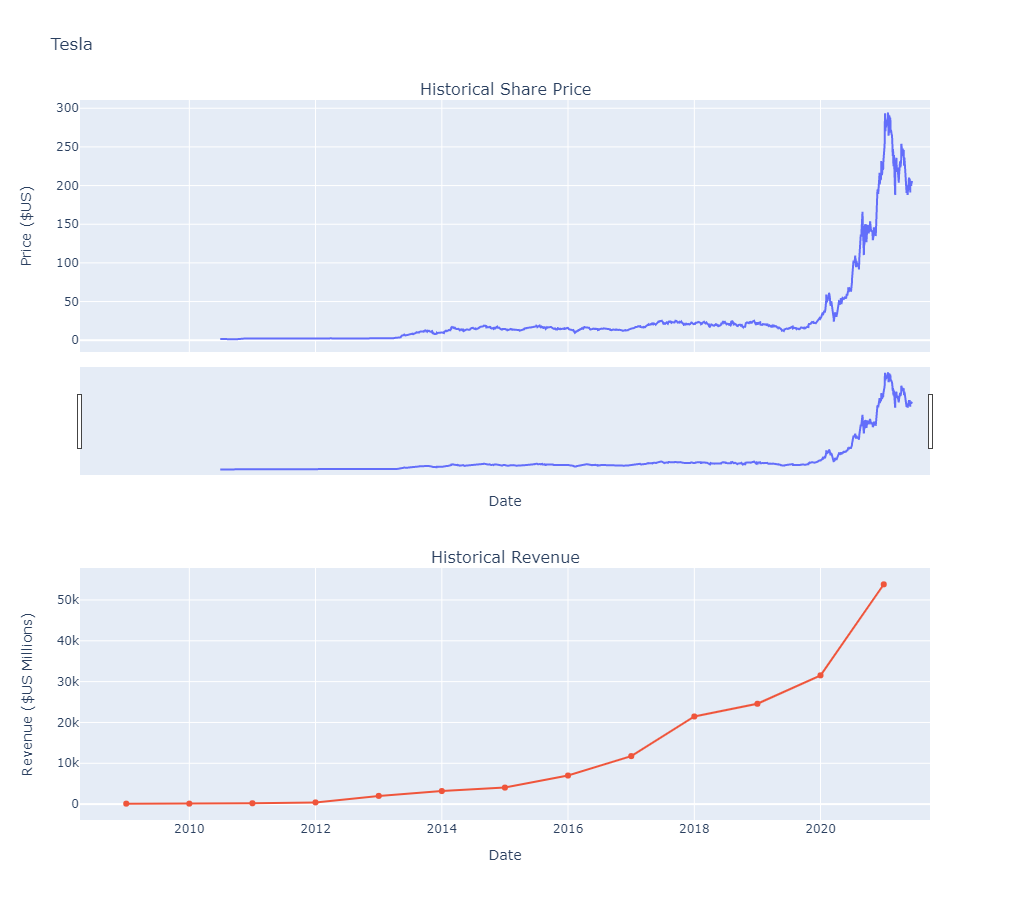

In [35]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


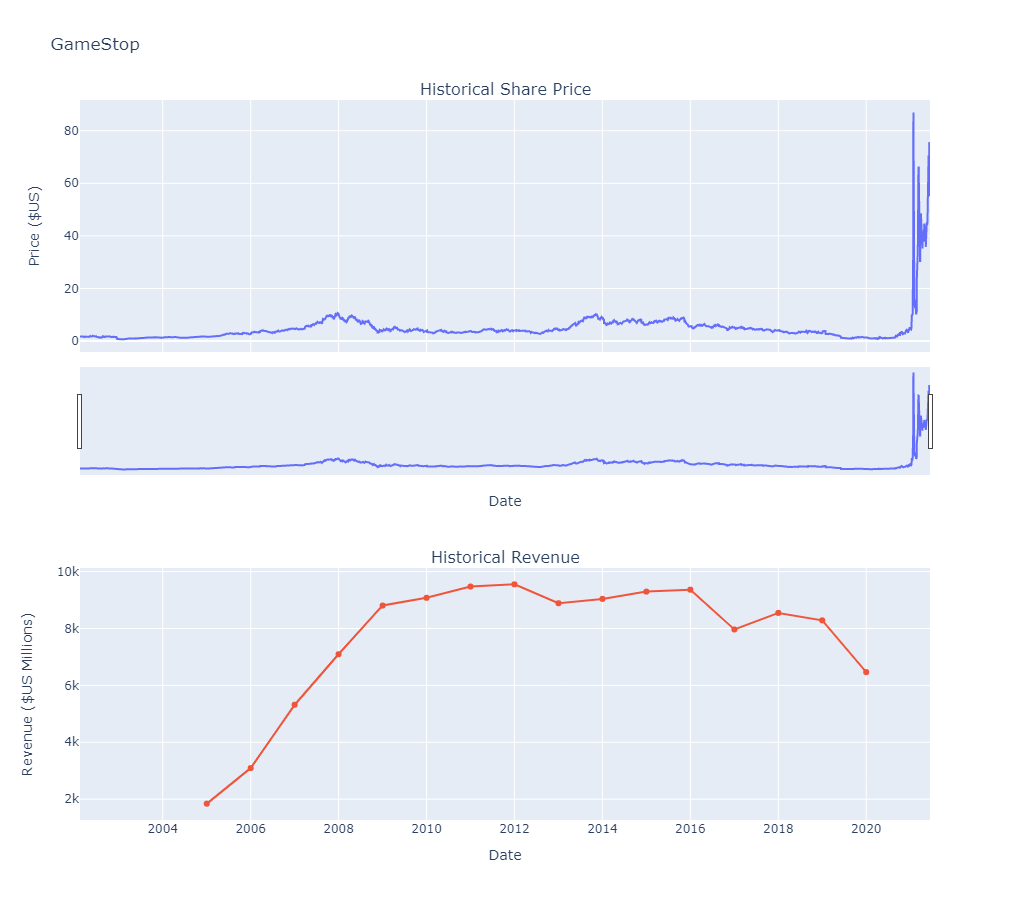

In [33]:
make_graph(gme_data,gme_revenue,'GameStop')